#**MEHWISH ZAMAN (DATA ANALYST)**
AS INTERN AT OASIS INFOBYTE

# **Idea: Predicting House Prices with Linear Regression**

# DESCRIPTION:
The objective of this project is to build a predictive model using linear regression to estimate a
numerical outcome based on a dataset with relevant features. Linear regression is a
fundamental machine learning algorithm, and this project provides hands-on experience in
developing, evaluating, and interpreting a predictive model.


# **Key Concepts and Challenges:**

1. Data Collection: Obtain a dataset with numerical features and a target variable for prediction.

2. Data Exploration and Cleaning: Explore the dataset to understand its structure, handle missing values, and ensure data quality.

3. Feature Selection: Identify relevant features that may contribute to the predictive model.

4. Model Training: Implement linear regression using a machine learning library (e.g., Scikit-
Learn).

5. Model Evaluation: Evaluate the model's performance on a separate test dataset using metrics such as Mean Squared Error or R-squared.

6. Visualization: Create visualizations to illustrate the relationship between the predicted and actual values.

In [ ]:
# IMPORTING LIBRARIES.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# LOADING DATA.
housing = pd.DataFrame(pd.read_csv("/content/level_2_project_1.zip"))

In [ ]:
# DATA EXPLORATION.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing.shape

(545, 13)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# describing dataset.
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
#checking unique values for each variable.
unique_values = housing.nunique()
unique_values

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [ ]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

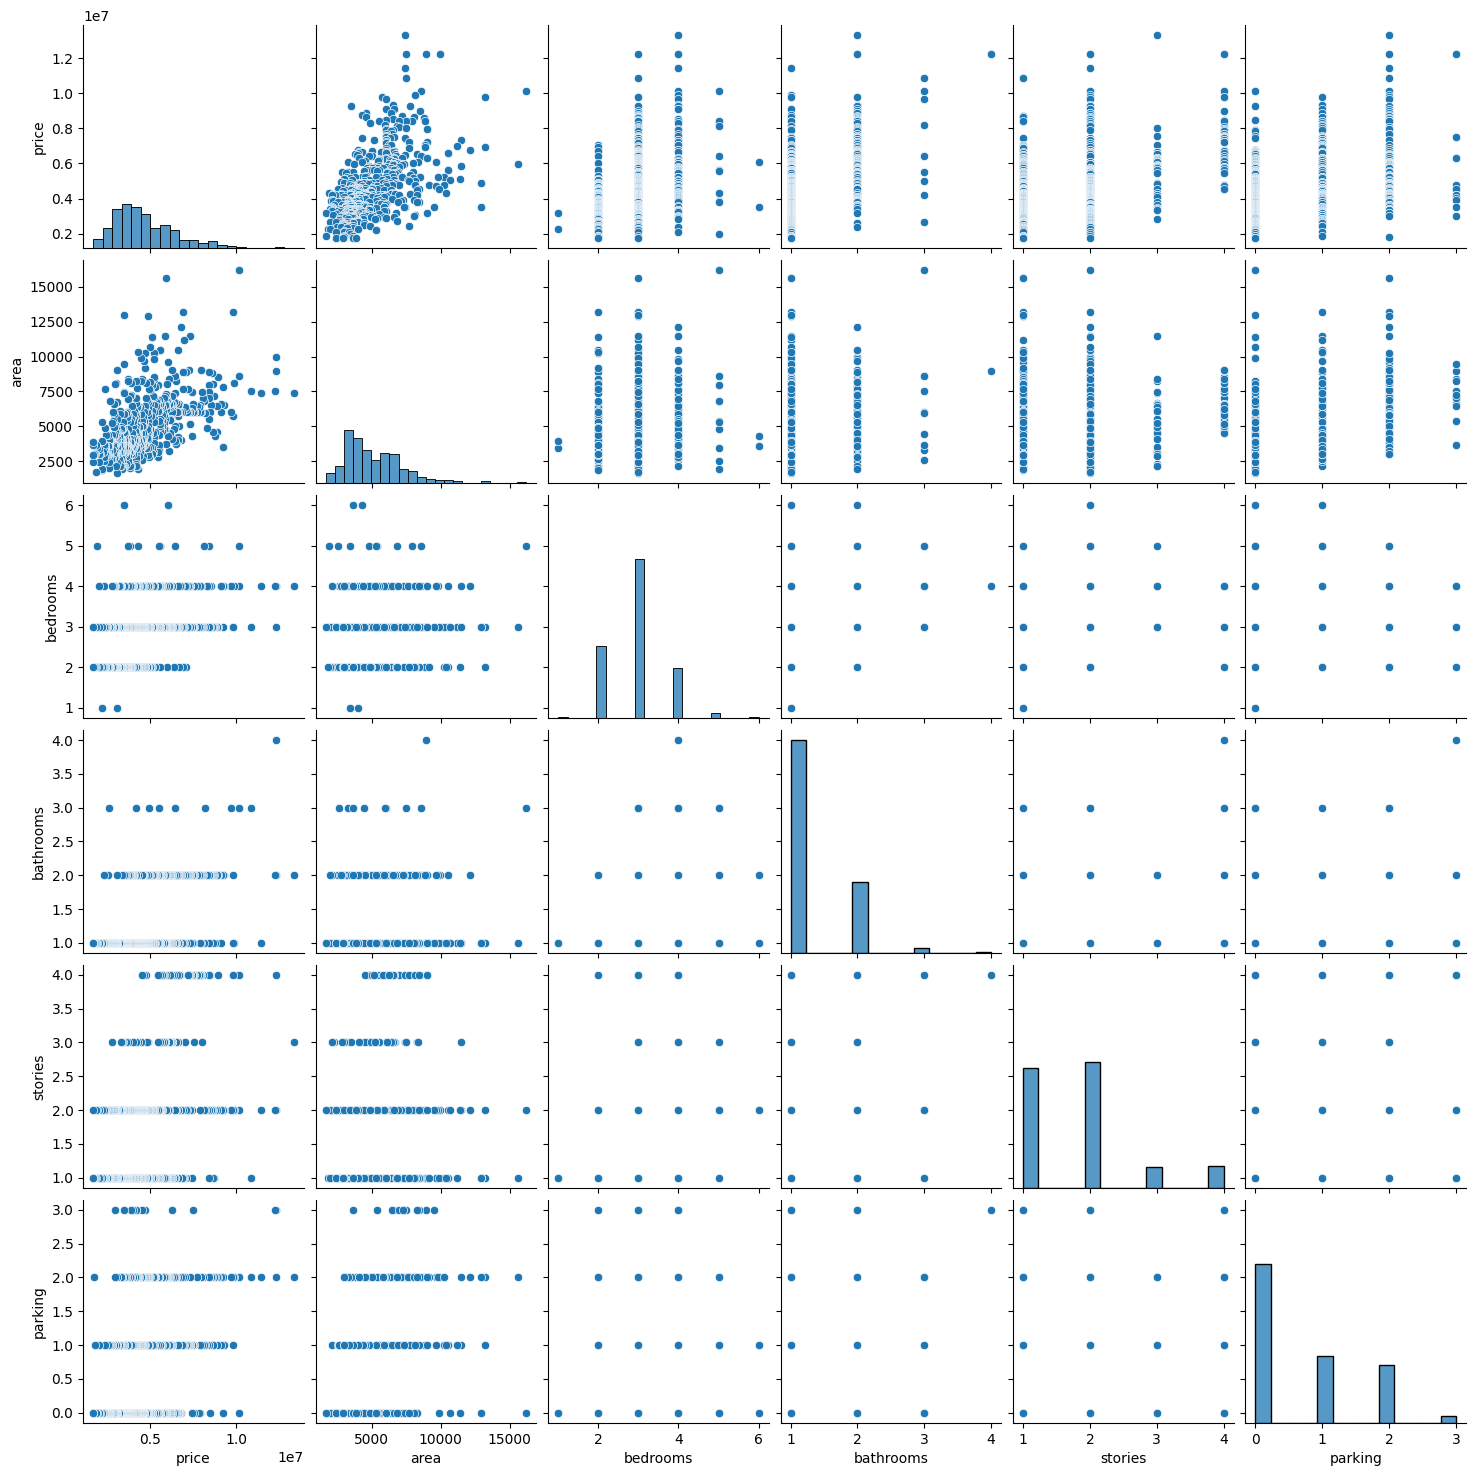

In [ ]:
# visualizing numerical variables.
sns.pairplot(housing)
plt.show()

<Axes: xlabel='price', ylabel='area'>

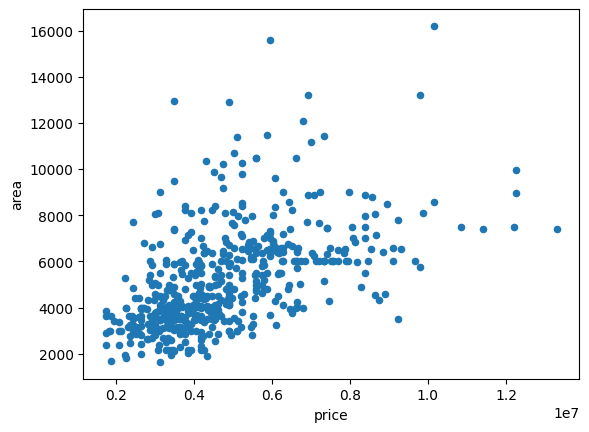

In [ ]:
# Create a scatter plot of price vs area
housing.plot.scatter(x='price', y='area')

In [ ]:
# Create a scatter plot of area vs price
import altair as alt
chart = alt.Chart(housing).mark_point().encode(
    x='area',
    y='price'
).interactive()
chart


alt.Chart(...)

In [ ]:
# Create a pivot table with bedrooms as rows and bathrooms as columns
pivot_table = housing.pivot_table(values='price', index='bedrooms', columns='bathrooms')

# Print the pivot table
print(pivot_table)

bathrooms             1             2          3           4
bedrooms                                                    
1          2.712500e+06           NaN        NaN         NaN
2          3.596852e+06  4.194750e+06        NaN         NaN
3          4.463484e+06  6.379569e+06  6807500.0         NaN
4          4.710583e+06  6.358990e+06  7250250.0  12250000.0
5          4.996250e+06  5.405750e+06  8295000.0         NaN
6          3.500000e+06  6.083000e+06        NaN         NaN


In [ ]:
housing.groupby(['furnishingstatus', 'prefarea']).mean()

<ipython-input-29-8cbe8a0a40c4>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



price         area  bedrooms  bathrooms  \
furnishingstatus prefarea                                                   
furnished        no        5.121072e+06  5321.979381  3.020619   1.371134   
                 yes       6.340779e+06  6514.000000  3.162791   1.395349   
semi-furnished   no        4.614918e+06  4911.977143  2.994286   1.297143   
                 yes       5.892257e+06  6022.365385  3.057692   1.326923   
unfurnished      no        3.731000e+06  4512.717241  2.800000   1.165517   
                 yes       5.256576e+06  5563.878788  2.969697   1.303030   

                            stories   parking  
furnishingstatus prefarea                      
furnished        no        1.896907  0.824742  
                 yes       2.046512  1.023256  
semi-furnished   no        1.840000  0.748571  
                 yes       1.673077  0.692308  
unfurnished      no        1.641379  0.413793  
                 yes       1.969697  0.818182

In [ ]:


# Creating train/test split
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = housing['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")

# Create a DataFrame for visualization
df= pd.DataFrame({'True Values': y_test, 'Predictions': y_pred})

# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='True Values', y='Predictions', title='True vs. Predicted Values')
fig.update_traces(marker=dict(size=10, opacity=0.5, line=dict(width=2, color='black')))

# Add hover data (x and y coordinates)
fig.update_traces(customdata=df.index)

# Customize the hover tooltip
fig.update_traces(hovertemplate='True Value: %{x}<br>Predicted Value: %{y}<br>Sample Index: %{customdata}')

# Add a trendline (optional)
fig.add_trace(go.Scatter(x=df['True Values'], y=df['True Values'], mode='lines', name='Trendline'))

# Customize the layout
fig.update_layout(
    xaxis_title="True Values",
    yaxis_title="Predictions"
)

# Show the interactive plot in the Jupyter Notebook
fig.show()

Mean Squared Error: 2292721545725.3623
Root Mean Squared Error: 1514173.5520492233
R-squared (R2) Score: 0.5464062355495871
